In [1]:
%matplotlib inline

# Import used libraries
import numpy
import pandas
import matplotlib.pyplot as plt
from ebin import TitanicClassifier

Using TensorFlow backend.


/Users/jani/anaconda/envs/kakkostensor/lib/python2.7/site-packages/pandas/core/common.py:328: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


                PassengerId  Survived      Pclass         Sex         Age  \
Survived                                                                    
0        count   424.000000       424  424.000000  424.000000  424.000000   
         mean    442.299528         0    2.485849    1.150943   30.626179   
         std     264.739548         0    0.743633    0.358417   14.172110   
         min       1.000000         0    1.000000    1.000000    1.000000   
         25%     200.750000         0    2.000000    1.000000   21.000000   
         50%     436.000000         0    3.000000    1.000000   28.000000   
         75%     683.250000         0    3.000000    1.000000   39.000000   
         max     891.000000         0    3.000000    2.000000   74.000000   
1        count   290.000000       290  290.000000  290.000000  290.000000   
         mean    457.768966         1    1.872414    1.679310   28.343690   
         std     250.845515         0    0.836617    0.467548   14.950952   

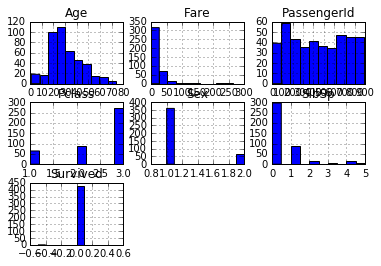

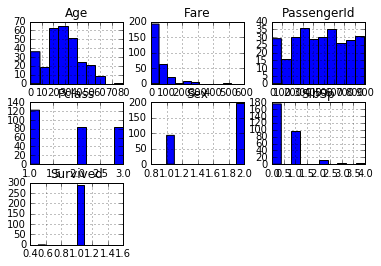

In [2]:
# Get descriptive stats
classifier = TitanicClassifier()
classifier.load_train_data()
classifier.descriptive_statistics()

In [22]:
# Train the classifier
classifier.train()

# load test data
testData = pandas.read_csv(
    "data/test.csv", header=0, usecols=[0, 1, 3, 4, 5, 8])

passengerIds = testData.filter(items=['PassengerId']).values[1:]
testData = testData.filter(items=['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])

testData = testData.replace(to_replace='male', value=1)
testData = testData.replace(to_replace='female', value=2)

#print testData

# Slice the test data without column labels
testData = testData.values[1:].astype(float)
results = classifier.model.predict(testData)

print results

Epoch 1/50
0s - loss: 0.4499 - acc: 0.7980
Epoch 2/50
0s - loss: 0.4633 - acc: 0.8022
Epoch 3/50
0s - loss: 0.4474 - acc: 0.8022
Epoch 4/50
0s - loss: 0.4569 - acc: 0.7938
Epoch 5/50
0s - loss: 0.4549 - acc: 0.7952
Epoch 6/50
0s - loss: 0.4562 - acc: 0.7938
Epoch 7/50
0s - loss: 0.4507 - acc: 0.7966
Epoch 8/50
0s - loss: 0.4481 - acc: 0.8008
Epoch 9/50
0s - loss: 0.4681 - acc: 0.7896
Epoch 10/50
0s - loss: 0.4494 - acc: 0.7910
Epoch 11/50
0s - loss: 0.4521 - acc: 0.7896
Epoch 12/50
0s - loss: 0.4540 - acc: 0.8008
Epoch 13/50
0s - loss: 0.4526 - acc: 0.8008
Epoch 14/50
0s - loss: 0.4509 - acc: 0.7924
Epoch 15/50
0s - loss: 0.4555 - acc: 0.7924
Epoch 16/50
0s - loss: 0.4568 - acc: 0.8065
Epoch 17/50
0s - loss: 0.4515 - acc: 0.7952
Epoch 18/50
0s - loss: 0.4529 - acc: 0.7952
Epoch 19/50
0s - loss: 0.4572 - acc: 0.7924
Epoch 20/50
0s - loss: 0.4514 - acc: 0.8036
Epoch 21/50
0s - loss: 0.4518 - acc: 0.7952
Epoch 22/50
0s - loss: 0.4472 - acc: 0.8008
Epoch 23/50
0s - loss: 0.4475 - acc: 0.79

In [23]:
# Save results to .csv
mapped_results = numpy.zeros((passengerIds.shape[0], 2), dtype=numpy.int32)

print mapped_results.shape, results.shape, passengerIds.shape[0]

# Map passengerid to prediction
for index in xrange(passengerIds.shape[0]):
    mapped_results[index, 0] = int(passengerIds[index])
    mapped_results[index, 1] = int(numpy.rint(results[index, 0]))
    
print mapped_results

# Save to csv
df_results = pandas.DataFrame(data=mapped_results, index=None, columns=['PassengerId', 'Survived'])
df_results.to_csv('results.csv', sep=',', index=None)

(417, 2) (417, 2) 417
[[ 893    1]
 [ 894    1]
 [ 895    1]
 [ 896    1]
 [ 897    1]
 [ 898    1]
 [ 899    1]
 [ 900    0]
 [ 901    1]
 [ 902    1]
 [ 903    1]
 [ 904    0]
 [ 905    1]
 [ 906    0]
 [ 907    0]
 [ 908    1]
 [ 909    1]
 [ 910    1]
 [ 911    1]
 [ 912    1]
 [ 913    1]
 [ 914    1]
 [ 915    1]
 [ 916    1]
 [ 917    1]
 [ 918    0]
 [ 919    1]
 [ 920    1]
 [ 921    1]
 [ 922    1]
 [ 923    1]
 [ 924    1]
 [ 925    1]
 [ 926    1]
 [ 927    1]
 [ 928    1]
 [ 929    0]
 [ 930    1]
 [ 931    1]
 [ 932    1]
 [ 933    1]
 [ 934    1]
 [ 935    0]
 [ 936    0]
 [ 937    1]
 [ 938    1]
 [ 939    1]
 [ 940    0]
 [ 941    1]
 [ 942    1]
 [ 943    1]
 [ 944    0]
 [ 945    1]
 [ 946    1]
 [ 947    1]
 [ 948    1]
 [ 949    1]
 [ 950    1]
 [ 951    1]
 [ 952    1]
 [ 953    1]
 [ 954    1]
 [ 955    0]
 [ 956    1]
 [ 957    1]
 [ 958    0]
 [ 959    1]
 [ 960    1]
 [ 961    1]
 [ 962    0]
 [ 963    1]
 [ 964    1]
 [ 965    1]
 [ 966    1]
 [ 967    1]
 [ 